In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

### 1 - Data Preparing and Loading

In [2]:
# create known parameters
w = 0.7
b = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1)
noise = torch.rand(50, 1) * 0.05
y = w * X + b + noise

X.shape, y.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

In [3]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)
print(len(X_train), len(X_test), len(y_train), len(y_test))

40 10 40 10


In [4]:
# visualize
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     prediction = None):
    plt.figure(figsize = (10, 7))

    plt.scatter(train_data, train_labels, c = 'b', s = 4, label = 'train data')
    plt.scatter(test_data, test_labels, c = 'g', s = 4, label = 'test data')

    if prediction is not None:
        plt.scatter(test_data, prediction, c = 'r')

    plt.legend()

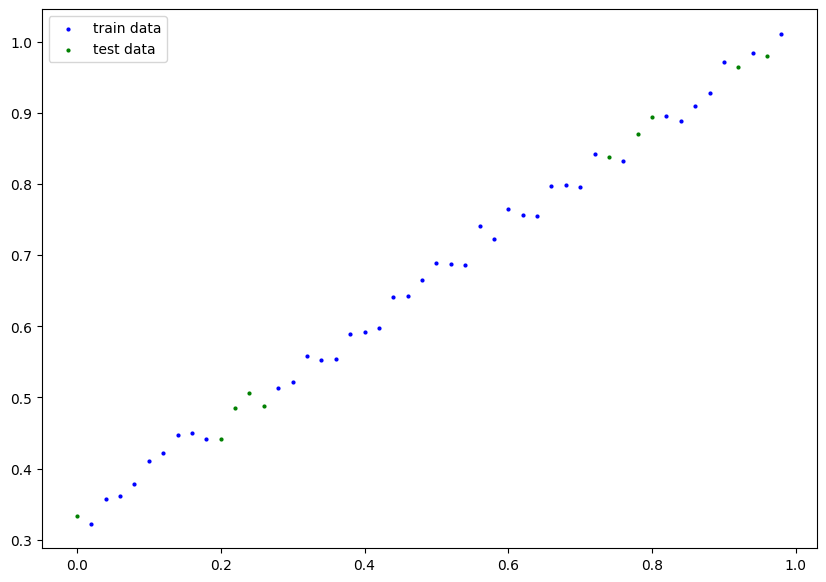

In [5]:
plot_predictions()

### 2 - Build Model Framework (self layer)

In [6]:
# define model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad = True,
                                               dtype = torch.float32))
        self.bias = nn.Parameter(torch.randn(1, requires_grad = True,
                                             dtype = torch.float32))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [7]:
# create model to see what's inside
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters()), model_0.state_dict()

([Parameter containing:
  tensor([0.3367], requires_grad=True),
  Parameter containing:
  tensor([0.1288], requires_grad=True)],
 OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))]))

### 3 - loss function and train models

In [8]:
# use nn.MSELoss, define loss and optimizer
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.01)

In [9]:
# train the model and record the running evaluations
epochs = 700
epoch_list = []
train_loss = []
eval_loss = []

for epoch in range(epochs):
    model_0.train()
    # forward pass
    y_pred = model_0(X_train)
    # calculate loss
    loss = loss_fn(y_pred, y_train)
    # zero grad
    optimizer.zero_grad()
    # back propagation
    loss.backward()
    # optimizer step
    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
        print(f'epoch {epoch}: | train_loss: {loss} | test_loss: {test_loss}')
        epoch_list.append(epoch)
        train_loss.append(loss)
        eval_loss.append(test_loss)

epoch 0: | train_loss: 0.14651867747306824 | test_loss: 0.151138037443161
epoch 10: | train_loss: 0.08952714502811432 | test_loss: 0.09392058104276657
epoch 20: | train_loss: 0.05514834076166153 | test_loss: 0.059160370379686356
epoch 30: | train_loss: 0.03440003842115402 | test_loss: 0.037991173565387726
epoch 40: | train_loss: 0.021868158131837845 | test_loss: 0.02505623921751976
epoch 50: | train_loss: 0.01428937166929245 | test_loss: 0.01711711660027504
epoch 60: | train_loss: 0.00969665963202715 | test_loss: 0.012214399874210358
epoch 70: | train_loss: 0.006904385052621365 | test_loss: 0.009161358699202538
epoch 80: | train_loss: 0.005197903607040644 | test_loss: 0.007238344755023718
epoch 90: | train_loss: 0.004146442748606205 | test_loss: 0.006008227821439505
epoch 100: | train_loss: 0.0034903399646282196 | test_loss: 0.00520495418459177
epoch 110: | train_loss: 0.0030730688013136387 | test_loss: 0.004666181746870279
epoch 120: | train_loss: 0.0028002772014588118 | test_loss: 0.

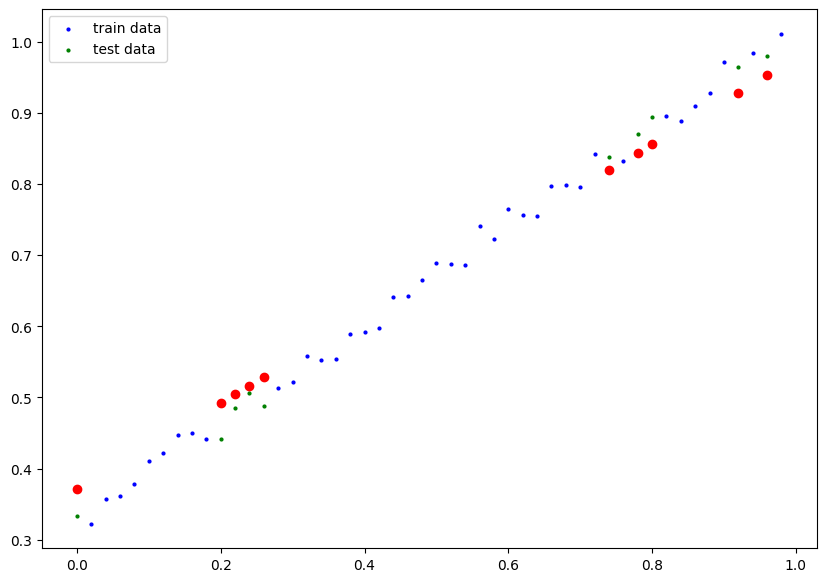

OrderedDict([('weights', tensor([0.6058])), ('bias', tensor([0.3710]))])

In [19]:
# evaluate model
with torch.inference_mode():
    y_pred = model_0(X_test)

plot_predictions(prediction = y_pred)
plt.show()
model_0.state_dict()

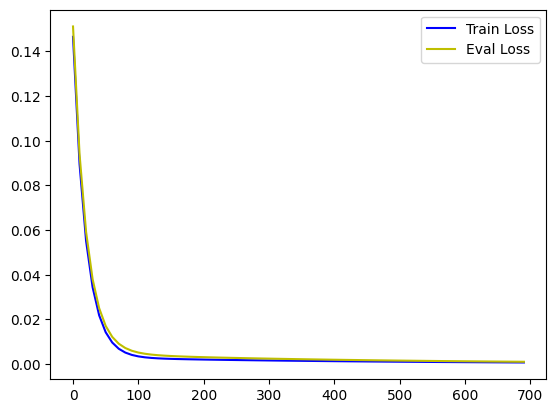

In [11]:
# plot loss curves
with torch.inference_mode():
    plt.plot(epoch_list, train_loss, label = "Train Loss", c = 'b')
    plt.plot(epoch_list, eval_loss, label = "Eval Loss", c = 'y')
    plt.legend()
    plt.show()

### 4 - save & load model
torch.save() in python pickel format

In [12]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6058])), ('bias', tensor([0.3710]))])

In [14]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
PATH = '/content/drive/MyDrive/pytorch/models/1_PyTorch_Workflow_LR_Model.pth'
torch.save(model_0.state_dict(), PATH)

In [17]:
# load model
model_1 = LinearRegressionModel()
model_1.load_state_dict(torch.load(PATH))
model_1.state_dict()

OrderedDict([('weights', tensor([0.6058])), ('bias', tensor([0.3710]))])